In [1]:
#pip install yfinance
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import yfinance as yf
#from yahoofinancials import YahooFinancials

In [2]:
# also
# yf.download(tickers = symbol, start = start, end = end)
symbol = 'AAPL'
aapl_df = yf.download(tickers=symbol)
aapl_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


In [3]:
# check we don't have nulls
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10828 entries, 1980-12-12 to 2023-11-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10828 non-null  float64
 1   High       10828 non-null  float64
 2   Low        10828 non-null  float64
 3   Close      10828 non-null  float64
 4   Adj Close  10828 non-null  float64
 5   Volume     10828 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 592.2 KB


<AxesSubplot:title={'center':'Apple historic'}, xlabel='Date'>

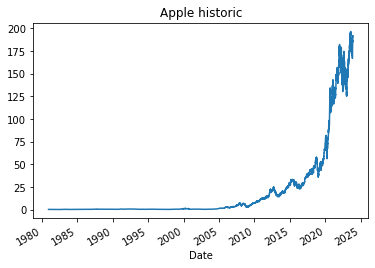

In [4]:
# pip install matplotlib
import matplotlib.pyplot as plt # Visualization
aapl_df['Close'].plot(title='Apple historic')

In [5]:
aapl_df_2022 = aapl_df.loc['2022-01-01' : '2022-12-31']
aapl_df_2022.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953888,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669998,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943970,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056961,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100


<AxesSubplot:title={'center':'Apple historic 2022'}, xlabel='Date'>

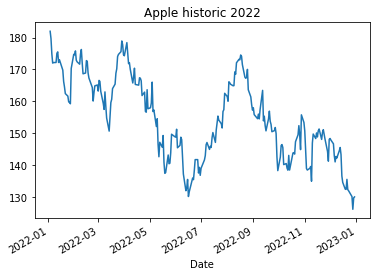

In [6]:
aapl_df_2022['Close'].plot(title='Apple historic 2022')

<AxesSubplot:title={'center':'Apple historic 2023'}, xlabel='Date'>

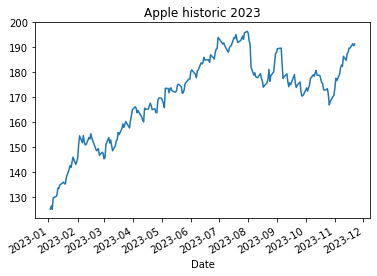

In [7]:
aapl_df_2023 = aapl_df.loc['2023-01-01' : '2023-12-31']
aapl_df_2023['Close'].plot(title='Apple historic 2023')

<AxesSubplot:title={'center':'Apple historic 2020-2023'}, xlabel='Date'>

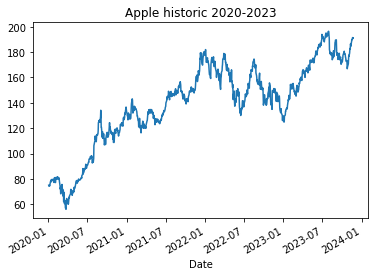

In [8]:
aapl_df_2020_2023 = aapl_df.loc['2020-01-01' : '2023-12-31']
aapl_df_2020_2023['Close'].plot(title='Apple historic 2020-2023')

In [9]:
# https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh#2
# pip install plotly
# pip install --upgrade nbformat
import plotly.graph_objects as go
from datetime import datetime

df = aapl_df_2020_2023

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [10]:
# with SMA and no EMA index
candlestick = go.Candlestick(
                            x=df.index,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close'],
                            showlegend=False,
                            increasing_line_color= 'blue', decreasing_line_color= 'orange',
                            )

sma = go.Scatter(x=df.index,
                 y=df["sma"],
                 yaxis="y1",
                 name="SMA"
                )
#ema = go.Scatter(x=df.index,
#                 y=df["EMA"],
#                 name="EMA"
#                )

#fig = go.Figure(data=[candlestick, sma, ema])
fig = go.Figure(data=[candlestick, sma])

fig.update_layout(
    width=1800, height=1600,
    title="Apple, Jan, 2020 to Dec, 2023",
    yaxis_title='AAPL Stock',
)

fig.show()

KeyError: 'sma'

In [ ]:
aapl_df_2020_2023 = df
aapl_df_2023_jan_dec = aapl_df_2020_2023.loc['2023-01-01' : '2023-12-31']
aapl_df_2023_jan_dec.head()
df = aapl_df_2023_jan_dec

# with SMA and no EMA index
candlestick = go.Candlestick(
                            x=df.index,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close'],
                            showlegend=False,
                            increasing_line_color= 'blue', decreasing_line_color= 'orange',
                            )

sma = go.Scatter(x=df.index,
                 y=df["SMA"],
                 yaxis="y1",
                 name="SMA"
                )
#ema = go.Scatter(x=df.index,
#                 y=df["EMA"],
#                 name="EMA"
#                )

#fig = go.Figure(data=[candlestick, sma, ema])
fig = go.Figure(data=[candlestick, sma])

fig.update_layout(
    width=1800, height=1600,
    title="Apple, Jan, 2020 to Dec, 2023",
    yaxis_title='AAPL Stock',
)

fig.show()

In [ ]:
def plot_candle_sma(dini, dend, df):
    df = df.loc[dini.strftime("%Y-%m-%d") : dend.strftime("%Y-%m-%d")]
    # with SMA and no EMA index
    candlestick = go.Candlestick(
                                x=df.index,
                                open=df['Open'],
                                high=df['High'],
                                low=df['Low'],
                                close=df['Close'],
                                showlegend=False,
                                increasing_line_color= 'blue', decreasing_line_color= 'orange',
                                )

    sma = go.Scatter(x=df.index,
                    y=df["SMA"],
                    yaxis="y1",
                    name="SMA"
                    )
    #ema = go.Scatter(x=df.index,
    #                 y=df["EMA"],
    #                 name="EMA"
    #                )

    #fig = go.Figure(data=[candlestick, sma, ema])
    fig = go.Figure(data=[candlestick, sma])

    fig.update_layout(
        width=1800, height=1600,
        title="Apple, Jan, 2020 to Dec, 2023",
        yaxis_title='AAPL Stock',
    )

    fig.show()

date_end = datetime.now()
date_start = datetime(2023, 9, 1)

print(date_end.strftime("%Y-%m-%d"), date_start.strftime("%Y-%m-%d"))
plot_candle_sma(date_start, date_end, aapl_df_2023_jan_dec)


2023-11-09 2023-09-01


NameError: name 'aapl_df_2023_jan_dec' is not defined

In [11]:
# my portfolio
# yf.download(tickers = symbol, start = start, end = end)
symbol = ["GENIUS21.MX", "BIMBOA.MX", "HERDEZ.MX", "BOLSAA.MX", "IVVPESOISHRS.MX", "WALMEX.MX"]
start = "2023-01-02" 
end = datetime.now().strftime("%Y-%m-%d")

portfolio_df = yf.download(tickers=symbol, start = start, end = end)
portfolio_df.head()
portfolio_df.info()

[*********************100%%**********************]  6 of 6 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2023-01-02 to 2023-11-22
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (Adj Close, BIMBOA.MX)        225 non-null    float64
 1   (Adj Close, BOLSAA.MX)        225 non-null    float64
 2   (Adj Close, GENIUS21.MX)      225 non-null    float64
 3   (Adj Close, HERDEZ.MX)        225 non-null    float64
 4   (Adj Close, IVVPESOISHRS.MX)  221 non-null    float64
 5   (Adj Close, WALMEX.MX)        225 non-null    float64
 6   (Close, BIMBOA.MX)            225 non-null    float64
 7   (Close, BOLSAA.MX)            225 non-null    float64
 8   (Close, GENIUS21.MX)          225 non-null    float64
 9   (Close, HERDEZ.MX)            225 non-null    float64
 10  (Close, IVVPESOISHRS.MX)      221 non-null    float64
 11  (Close, WALMEX.MX)            225 n

In [12]:
portfolio_df.to_csv("stocks_portfolio.csv")

In [13]:
BOLSA_df = portfolio_df.Close["BOLSAA.MX"]
BOLSA_df.info()
#BOLSA_df.head()

<class 'pandas.core.series.Series'>
DatetimeIndex: 226 entries, 2023-01-02 to 2023-11-22
Series name: BOLSAA.MX
Non-Null Count  Dtype  
--------------  -----  
225 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


In [14]:
BOLSA_df.head()

Date
2023-01-02    38.160000
2023-01-03    37.590000
2023-01-04    37.930000
2023-01-05    37.830002
2023-01-06    38.259998
Name: BOLSAA.MX, dtype: float64

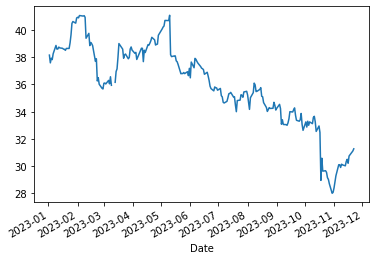

In [15]:
BOLSA_df.plot()
plt.show()

In [16]:
# interactive plots
import cufflinks as cf

In [17]:
cf.set_config_file(offline = True)
BOLSA_df.iplot()

In [18]:
# now for all dataframe with Close price
portfolio_df.Close.iplot()

In [19]:
ivvpesoishrs = portfolio_df.swaplevel(axis = 1)["IVVPESOISHRS.MX"].copy()
ivvpesoishrs.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,70.349998,70.349998,71.400002,70.080002,70.800003,730395.0
2023-01-04,70.769997,70.769997,71.260002,70.589996,70.589996,931238.0
2023-01-05,70.339996,70.339996,71.500000,70.339996,71.000000,2578.0
2023-01-06,72.000000,72.000000,72.000000,70.589996,70.709999,411499.0


In [20]:
# ivvpesoishrs.loc["2017-05"].iplot(kind= "candle")
ivvpesoishrs.loc["05-2023"].iplot(kind= "candle", 
                                  colorscale= "pubugn", 
                                  title= "IVVPESOISHRS.MX", 
                                  xTitle= "Time", 
                                  yTitle= "Stock Price")


In [21]:
# same data but with another granullarity (weekly)
ivvpesoishrs = portfolio_df.swaplevel(axis = 1)["IVVPESOISHRS.MX"].copy()
weekly = ivvpesoishrs.resample("W-Fri").agg({"Open":"first",
                                   "High":"max",
                                   "Low":"min",
                                   "Close":"last"
                                  })
weekly.head()

,Open,High,Low,Close
Date,,,,
2023-01-06,70.800003,72.000000,70.080002,72.000000
2023-01-13,72.199997,73.919998,71.949997,73.919998
2023-01-20,73.919998,74.099998,72.099998,73.260002
2023-01-27,74.160004,75.650002,73.620003,75.620003
2023-02-03,75.320000,78.970001,74.510002,76.120003


In [22]:
weekly.loc["5-2023":].iplot(kind= "candle")

In [23]:
# adding more technical stuff
ivvpesoishrs.loc["09-2023":].iplot(kind= "candle", 
                                  colorscale= "pubugn", 
                                  title= "IVVPESOISHRS.MX", 
                                  xTitle= "Time", 
                                  yTitle= "Stock Price")

In [24]:
# adding more technical stuff
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
type(qf)

qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [25]:
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_volume(colorchange=False)
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [26]:
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_sma(periods=20)
qf.add_sma(periods=100)
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [27]:
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_ema(periods=20)
qf.add_ema(periods=100)
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [28]:
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_ema(periods=50)
qf.add_sma(periods=50)
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [30]:
# QuantFig is apersistent object
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_ema([5,15],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_sma([5,10],width=2,color=['blue','lightblue'],legendgroup=True)
qf.add_rsi(periods=10,color='orange')
qf.add_bollinger_bands(periods=5,boll_std=2,colors=['magenta','grey'],fill=True)
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [31]:
# QuantFig is apersistent object
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_ema([5,15],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_sma([5,10],width=2,color=['blue','lightblue'],legendgroup=True)
qf.add_rsi(periods=10,color='orange')
qf.add_bollinger_bands(periods=5,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_volume()
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [34]:
# QuantFig is apersistent object
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_ema([5,15],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_sma([5,10],width=2,color=['blue','lightblue'],legendgroup=True)
qf.add_rsi(periods=10,color='orange')
qf.add_bollinger_bands(periods=5,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_volume()
qf.add_trendline(date0="2023-11-01", date1="2023-11-15") # trendline in red
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [37]:
# QuantFig is apersistent object
# with this resistance we see that is going up the price so stay in
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_ema([5,15],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_sma([5,10],width=2,color=['blue','lightblue'],legendgroup=True)
qf.add_resistance(date="2023-10-17") # is from a date on
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")

In [38]:
# QuantFig is apersistent object
# with this resistance we see that is going up the price so stay in
qf = cf.QuantFig(df = ivvpesoishrs.loc["09-2023":])
qf.add_ema([5,15],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_sma([5,10],width=2,color=['blue','lightblue'],legendgroup=True)
qf.add_resistance(date="2023-10-17") # is from a date on
qf.add_support(date="2023-10-31")
qf.iplot(title= "IVVPESOISHRS.MX", name = "MX ETFs")